<a href="https://colab.research.google.com/github/Harshh18/Computer-Vision-Practicals/blob/main/Exp10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 55ms/step - accuracy: 0.3529 - loss: 1.7531 - val_accuracy: 0.5468 - val_loss: 1.2880
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 48ms/step - accuracy: 0.5744 - loss: 1.2005 - val_accuracy: 0.6109 - val_loss: 1.1006
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.6411 - loss: 1.0199 - val_accuracy: 0.6387 - val_loss: 1.0253
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.6760 - loss: 0.9152 - val_accuracy: 0.6791 - val_loss: 0.9323
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.7068 - loss: 0.8348 - val_accuracy: 0.6864 - val_loss: 0.9226
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.7277 - loss: 0.7809 - val_accuracy: 0.6876 - val_loss: 0.9312
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7422 - loss: 0.7318 - val_accuracy: 0.6942 - val_loss: 0.9036
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.7633 

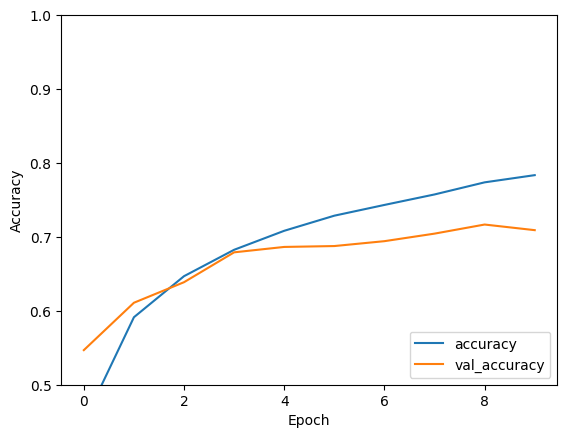

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and Preprocess the CIFAR-10 Dataset
def load_data():
    # Load the CIFAR-10 dataset
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

    # Normalize pixel values to be between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0
    return train_images, train_labels, test_images, test_labels

# Build the CNN Model
def build_model():
    model = models.Sequential()

    # 1st Convolutional Layer + MaxPooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # 2nd Convolutional Layer + MaxPooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # 3rd Convolutional Layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Flatten the output and feed it into Dense layers
    model.add(layers.Flatten())

    # Fully connected layer with 64 units
    model.add(layers.Dense(64, activation='relu'))

    # Output layer with 10 units (for 10 classes) and no activation since we're using logits
    model.add(layers.Dense(10))
    return model

# Compile and Train the Model
def compile_and_train(model, train_images, train_labels, test_images, test_labels):
    # Compile the model with Adam optimizer and Sparse Categorical Crossentropy loss
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10,
                        validation_data=(test_images, test_labels))
    return history

# Evaluate the Model's performance on the test data
def evaluate_model(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Test accuracy: {test_acc}")

# Plot Training History
def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()

# Main function to load data, build CNN model, train, and evaluate
def main():
    train_images, train_labels, test_images, test_labels = load_data()
    model = build_model()
    history = compile_and_train(model, train_images, train_labels, test_images, test_labels)
    evaluate_model(model, test_images, test_labels)
    plot_history(history)

if __name__ == "__main__":
    main()